# Laboratorio 3

Juan Pablo Rodas Martinez

carnet 23007125

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Parte #1 - Numpy

### 1)

In [20]:
a = np.full(1000,True)

print(f'El tamaño en bytes de un array de 100 elementos de tipo booleano es de {a.nbytes} bytes')

El tamaño en bytes de un array de 100 elementos de tipo booleano es de 1000 bytes


### 2)

In [42]:
b =  np.arange(2,101,2)
b = b[::-1]

print(b[-10:])

[20 18 16 14 12 10  8  6  4  2]


### 3)

In [101]:
c = np.array([[2,4,5,6],
             [0,3,7,4],
             [8,8,5,2],
             [1,5,6,1]])
print(f'dada la matriz {c}\n')

print(f'seleccionar: {c[1]}\n')
print(f'seleccionar: \n{c[0:3:2][0::1,0:3:2]}')

dada la matriz [[2 4 5 6]
 [0 3 7 4]
 [8 8 5 2]
 [1 5 6 1]]

seleccionar: [0 3 7 4]

seleccionar: 
[[2 5]
 [8 5]]


### 4)

In [104]:
a = np.array([1,4,2,7])
b = np.array([1,3,2,9])

c = a-b
print(f'La madia aritmetica de (a-b) es = {c.mean()}')

La madia aritmetica de (a-b) es = -0.25


### 5)

In [142]:
coordenadas = np.array([[1.33,4.5],[30.0,10.7],[70.2,0.5]])
coordenadas=np.append(coordenadas,[[37.1,-3.6]],axis=0)
print(coordenadas)
print(f'Las dimensiones del array son: {coordenadas.shape}')

[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]
Las dimensiones del array son: (4, 2)


### 6)

In [149]:
newCoord=coordenadas.transpose()
newCoord=np.append(newCoord,[[10.8],[3.0]],axis=1)
newCoord=np.append(newCoord,[[35.8],[12.0]],axis=1)
print(f'El nuevo array es: \n{newCoord}')

El nuevo array es: 
[[ 1.33 30.   70.2  37.1  10.8  35.8 ]
 [ 4.5  10.7   0.5  -3.6   3.   12.  ]]


## Parte #2 - Exploracion y Mineria de datos

In [155]:
dataset = pd.read_csv('NucleosPoblacion.csv')
dataset.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


### 1)

In [159]:
Filtro=len(dataset[dataset['Poblacion'] >= 100000])
print(f'hay {Filtro} municipios con mas de 100,000 de poblacion')

hay 62 municipios con mas de 100,000 de poblacion


### 2)

<BarContainer object of 52 artists>

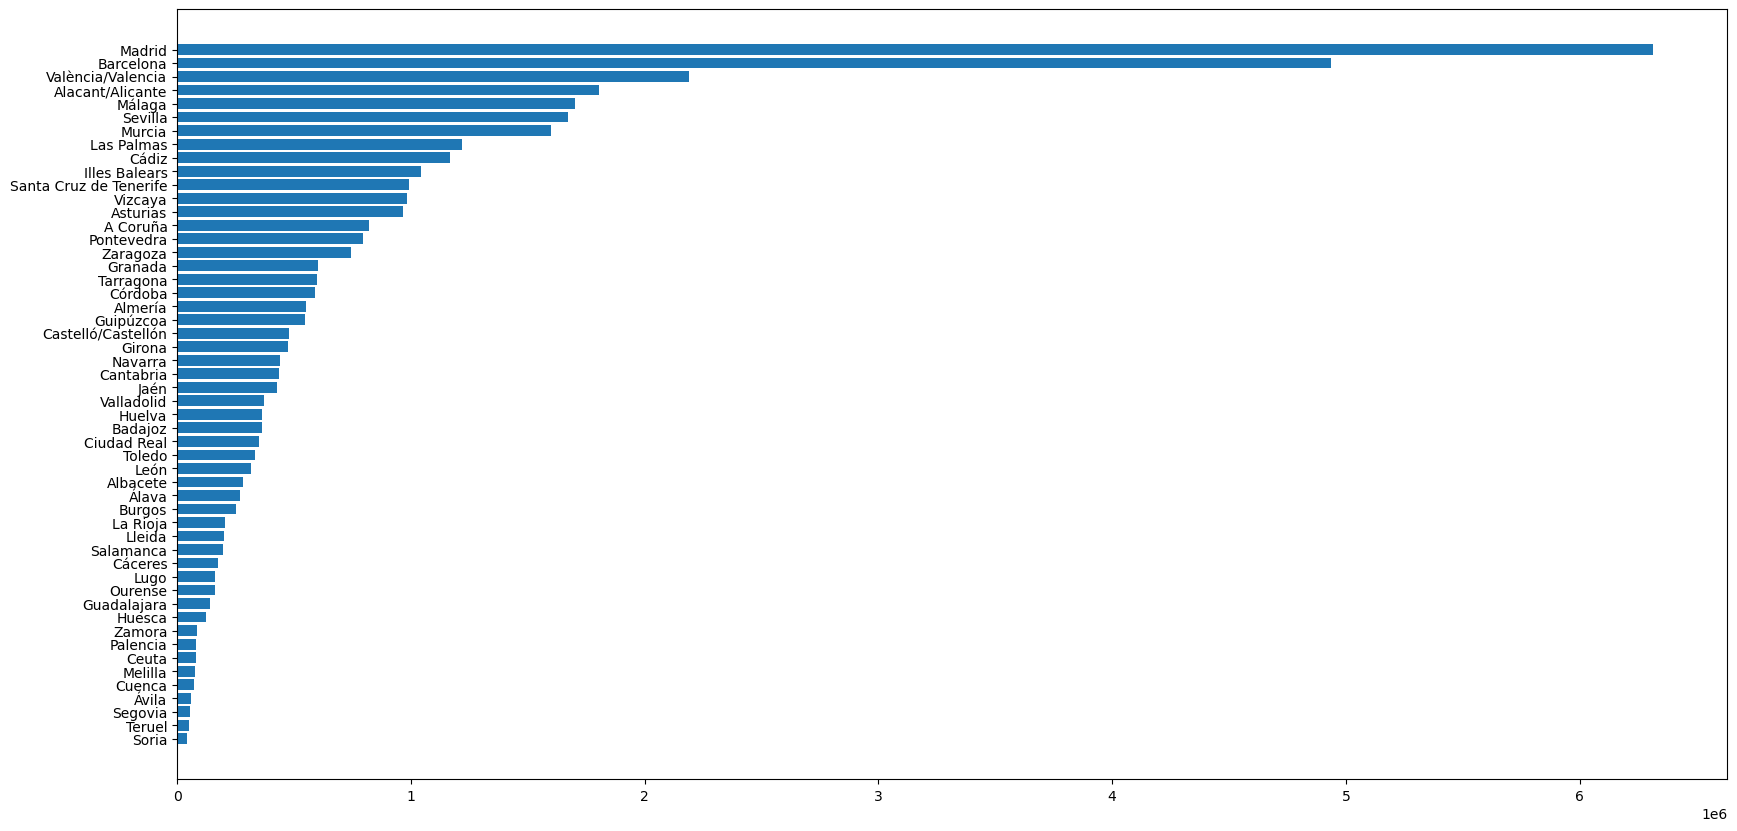

In [221]:
DataSort=dataset[['Poblacion','Provincia']].groupby('Provincia').sum().sort_values('Poblacion').reset_index()
plt.barh('Provincia','Poblacion',data=DataSort)

In [254]:
respuesta_a=DataSort.iloc[-2]['Provincia']
print(f'La segunda ciudad as poblada es {respuesta_a}')

La segunda ciudad as poblada es Barcelona


In [276]:
a=DataSort.loc[DataSort['Provincia']=='Granada'].index[0]+1
b=len(DataSort)
print(f'El lugar que ocupa Granada en el ranking de las ciudades mas pobladas es {b-a}°')

El lugar que ocupa Granada en el ranking de las ciudades mas pobladas es 16°


### 3)

In [282]:
respuesta=len(dataset[(dataset['Provincia']=='Badajoz') |
        (dataset['Provincia']=='Cáceres') &
        (dataset['Poblacion'] >= 5000)])

print(f'Hay {respuesta} municipios de Extremadura con mas de 5,000 habitantes')

Hay 14 municipios de Extremadura con mas de 5,000 habitantes


### 4)

In [296]:
DataSort=dataset[['Poblacion','Provincia','Municipio','Y']].sort_values('Y',ascending=False)
Northest=DataSort.iloc[0]

print(f'El municipio situado mas al orte es {Northest[2]} en la provincia de {Northest[1]} con poblacion de {Northest[0]}')

El municipio situado mas al orte es Viveiro en la provincia de Lugo con poblacion de 16211.0


### 5)

In [305]:
DataSort=dataset[dataset['Provincia']=='Granada']
media=DataSort['Poblacion'].mean()
mediana=DataSort['Poblacion'].median()
desvest=DataSort['Poblacion'].std()
maxVal=DataSort['Poblacion'].max()
minVal=DataSort['Poblacion'].min()

print(f'De la poblacion de granada:\n la media es {media} \n la mediana es {mediana} \n la desviacion estandar es {round(desvest,2)} \n el valor maximo es {maxVal} \n el valor minimo es {minVal}')

De la poblacion de granada:
 la media es 30217.85 
 la mediana es 17526.0 
 la desviacion estandar es 50355.49 
 el valor maximo es 239154.0 
 el valor minimo es 10386.0


### 6)

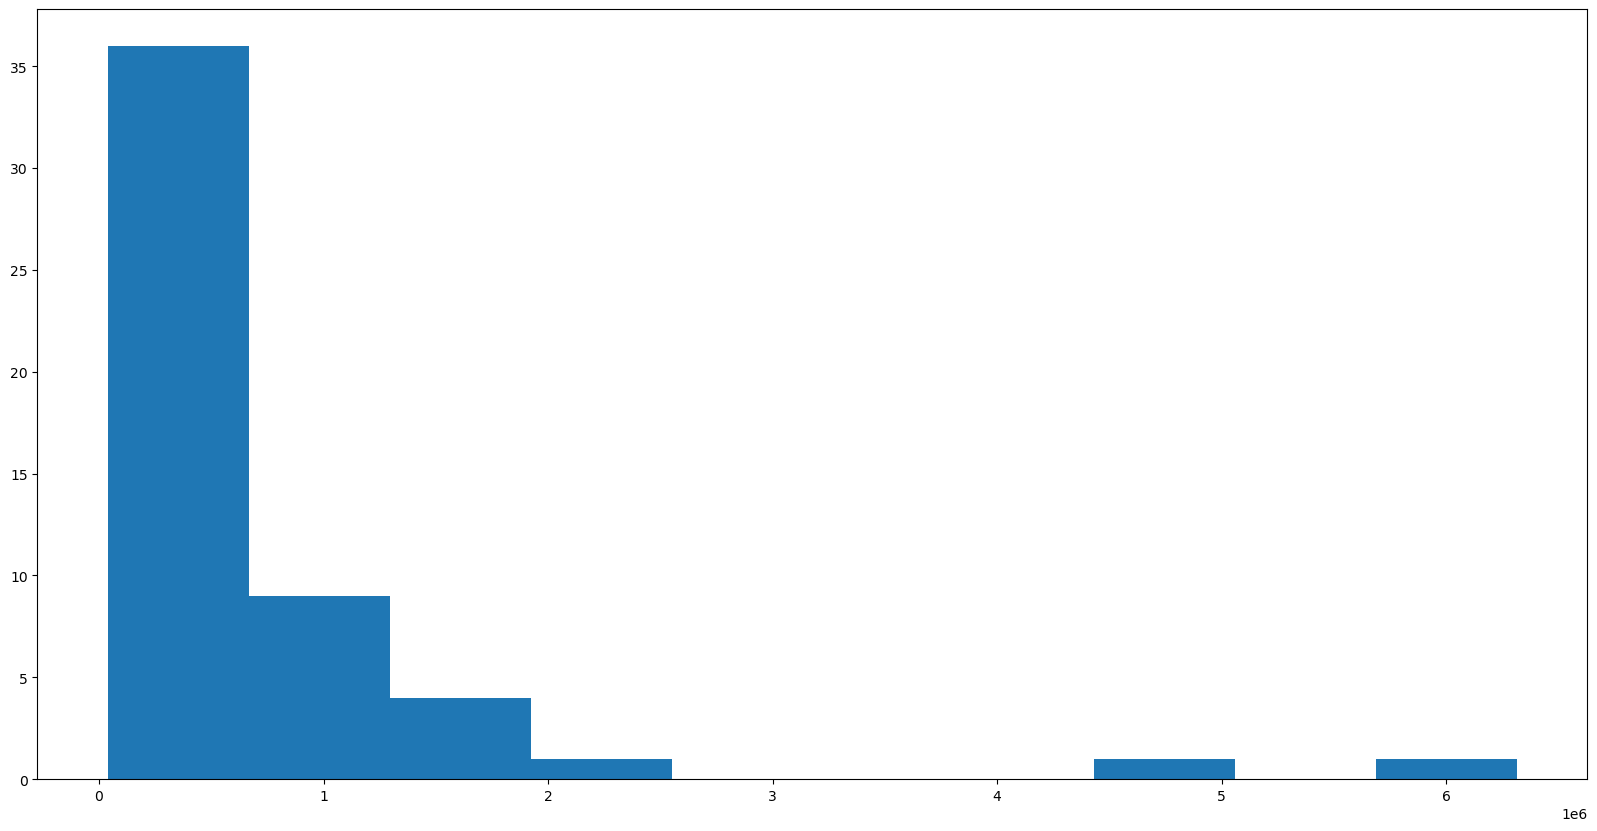

In [396]:
DataSort=dataset.groupby('Provincia').sum().reset_index()
plt.hist(DataSort['Poblacion'])
plt.show()

### 7)

In [411]:
Municipios=dataset['Municipio'].unique()
RandMuni=np.random.choice(Municipios,50)
media=round(dataset[dataset['Municipio'].isin(RandMuni)]['Poblacion'].mean(),2)
desvest=round(dataset[dataset['Municipio'].isin(RandMuni)]['Poblacion'].std(),2)

print(f'para los municipios de {RandMuni} \n \n la media de la poblacion es: {media} \n la desviacion estandar es: {desvest}')

para los municipios de ['Manacor' 'Bailén' 'Baena' 'Teguise' 'Olivenza' 'Mora' 'Valdepeñas'
 'Talavera de la Reina' 'Massamagrell' 'Las Rozas de Madrid' 'Moaña'
 'Santa María de Guía de Gran Canaria' 'Tordera' 'Picanya' 'Santa Úrsula'
 'San Martín del Rey Aurelio' 'Brenes' 'Teguise' 'Tomelloso' 'Avilés'
 'Portugalete' 'Abrera' 'Igualada' 'Valladolid' 'Almuñécar'
 'Santa Marta de Tormes' 'Castellbisbal' 'Benidorm' 'Villaquilambre'
 'Vila-real' 'El Vendrell' 'San Agustín del Guadalix' 'Roses' 'Móstoles'
 'La Pobla de Vallbona' 'Cardedeu' 'Pinto' 'Villamartín' 'Argentona'
 'Palamós' 'Argentona' 'Basauri' 'Mora' 'Meco' 'Avilés'
 'El Viso del Alcor' 'El Campello' 'Arucas' 'Montcada i Reixac'
 'Cornellà de Llobregat'] 
 
 la media de la poblacion es: 39521.27 
 la desviacion estandar es: 52758.53


### 8)

In [493]:
x_Madrid = float(dataset[dataset['Municipio']=='Madrid']['X'])
y_Madrid = float(dataset[dataset['Municipio']=='Madrid']['Y'])

DataSort = dataset[dataset['Municipio']!='Madrid'].copy()
DataSort['DistMadrid']=((x_Madrid-DataSort['X'])**2+(y_Madrid-DataSort['Y'])**2)**0.5
DataSort=DataSort.sort_values('DistMadrid').reset_index(drop=True)

Cercano=DataSort.loc[0,'Municipio']
Lejano=DataSort.loc[len(DataSort)-1,'Municipio']

print(f'El municipio mas cercano a Madrid es {Cercano}')
print(f'El municipio mas lejano a madrid es {Lejano}')

El municipio mas cercano a Madrid es Pozuelo de Alarcón
El municipio mas lejano a madrid es Los Llanos de Aridane
